# Graphs

## Imports

In [4]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


## Global Values

In [8]:
NUMBER_TORNADOS = 108 #Number of Tornado Events
NUMBER_DAYS = 57 #Number of days of data per Tornado
FILE_NAME = "historical_data_fin.csv" #CSV file that contains the data


## Loading Data

In [9]:
#Field 0: 'datatime'
#Field 1: 'temperature'
#Field 2: 'windspeed'
#Field 3: 'surface solar radiation' -Alvaro
#Field 4: 'relative humidity' -Abdullah
#Field 5: 'surface pressure' -Frazier
#Field 6: 'total precipitation' -Simon
#Field 7: 'latitude'
#Field 8: 'longitude'

data = pd.read_csv (FILE_NAME,header=None)

#Take data to numPy
numData = data.to_numpy()


FileNotFoundError: [Errno 2] No such file or directory: 'Deliverable_3/historical_data_final.csv'

## Helper functions

In [5]:
#Returns all elements of all Tornadoes for a specific field (0-8)
def getAllDataByField(field): 
    
    return numData[1:,field:field+1]

#Returns elements of a given field (0-8) for a particular Tornado (0-107)
def getDataByFieldAndIndex(field, event):
    
    return numData[1+(NUMBER_DAYS*event):(NUMBER_DAYS*(event+1)+1),field:field+1]


#### Sample Data Graph
##### Temperature leading to Tornado 0

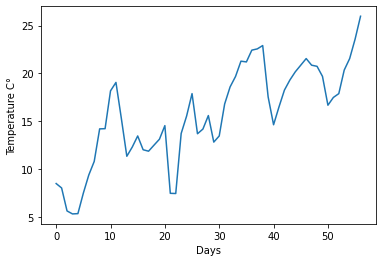

In [6]:
plt.ylabel("Temperature C°")
plt.xlabel("Days")
plt.plot(np.arange(NUMBER_DAYS),getDataByFieldAndIndex(1,0).astype(np.float).flatten())

plt.show()

## Temperature

### Linear graph of Temperature for all Tornados

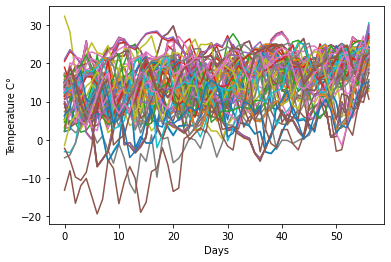

In [7]:
plt.ylabel("Temperature C°")
plt.xlabel("Days")

for i in range(NUMBER_TORNADOS):
    plt.plot(np.arange(NUMBER_DAYS),getDataByFieldAndIndex(1,i).astype(np.float).flatten())
plt.show()

### Linear graph of Net Temperatures for all Tornados

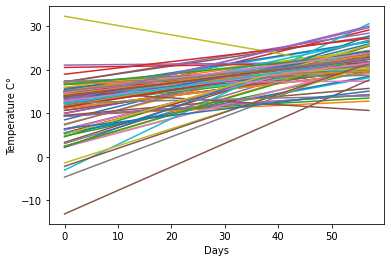

In [8]:
plt.ylabel("Temperature C°")
plt.xlabel("Days")

for i in range(NUMBER_TORNADOS):
    plt.plot([0,NUMBER_DAYS],[getDataByFieldAndIndex(1,i).astype(np.float).flatten()[0],getDataByFieldAndIndex(1,i).astype(np.float).flatten()[NUMBER_DAYS-1]])
plt.show()

### Mean and Median of Temperatures across all Tornados 

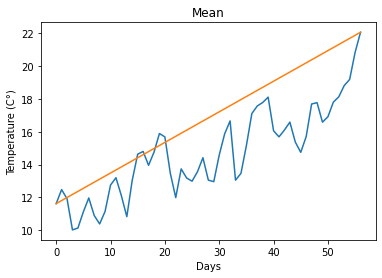

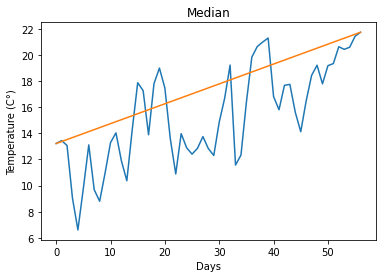

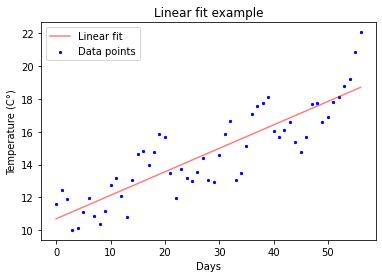

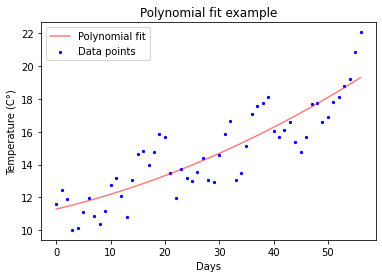

In [9]:
#Reshape array into 2D
arr2d = np.reshape(getAllDataByField(1), (-1, NUMBER_DAYS)).astype(np.float)

#Mean
arrmean = np.mean(arr2d,axis=0)
plt.plot(np.arange(NUMBER_DAYS),arrmean)
plt.plot([0,NUMBER_DAYS-1],[arrmean[0],arrmean[NUMBER_DAYS-1]])

plt.title("Mean")
plt.ylabel("Temperature (C°)")
plt.xlabel("Days")
plt.show()

#Median
arrmedian = np.median(arr2d,axis=0)
plt.plot(np.arange(NUMBER_DAYS),arrmedian)
plt.plot([0,NUMBER_DAYS-1],[arrmedian[0],arrmedian[NUMBER_DAYS-1]])

plt.title("Median")
plt.ylabel("Temperature (C°)")
plt.xlabel("Days")
plt.show()

#Polyfit

#Linear fit
x = np.arange(NUMBER_DAYS)
y = arrmean
fit = np.polyfit(x,y,1)
ang_coeff = fit[0]
intercept = fit[1]
fit_eq = ang_coeff*x + intercept
fig = plt.figure()
ax = fig.subplots()
ax.plot(x, fit_eq,color = 'r', alpha = 0.5, label = 'Linear fit')
ax.scatter(x,y,s = 5, color = 'b', label = 'Data points') #Original data points
ax.set_title('Linear fit example')
plt.ylabel("Temperature (C°)")
plt.xlabel("Days")
ax.legend()
plt.show()

#Polynomial Fit
fit = np.polyfit(x, y, 2)
a = fit[0]
b = fit[1]
c = fit[2]
fit_equation = a * np.square(x) + b * x + c
#Plotting
fig1 = plt.figure()
ax1 = fig1.subplots()
ax1.plot(x, fit_equation,color = 'r',alpha = 0.5, label = 'Polynomial fit')
ax1.scatter(x, y, s = 5, color = 'b', label = 'Data points')
ax1.set_title('Polynomial fit example')
plt.ylabel("Temperature (C°)")
plt.xlabel("Days")
ax1.legend()
plt.show()


### Net Positive Temperatures vs Net Negative Temperatures

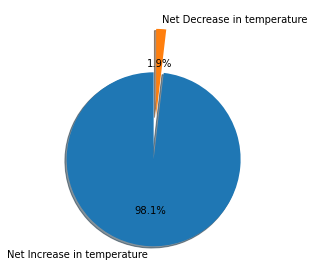

In [10]:
labels = ['Net Increase in temperature','Net Decrease in temperature']
sizes = [0,0]
explode = (.5,0)

for i in range(NUMBER_TORNADOS):
    
    #If temperature increased approaching day of Tornado
    if(getDataByFieldAndIndex(1,i).astype(np.float).flatten()[NUMBER_DAYS-1] - getDataByFieldAndIndex(1,i).astype(np.float).flatten()[0] > 0):
        sizes[0] += 1
    else:
        sizes[1] += 1

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()     

## Wind Speed

### Linear graph of Wind speeds for all Tornados

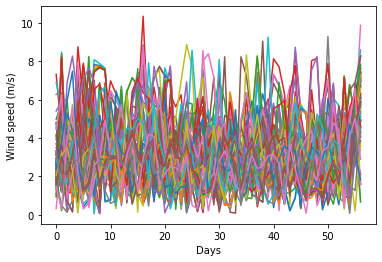

In [11]:
plt.ylabel("Wind speed (m/s)")
plt.xlabel("Days")

for i in range(NUMBER_TORNADOS):
    plt.plot(np.arange(NUMBER_DAYS),getDataByFieldAndIndex(2,i).astype(np.float).flatten())
    
plt.show()

### Linear graph of Net speeds for all Tornados

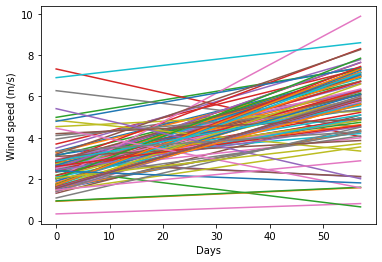

In [12]:
plt.ylabel("Wind speed (m/s)")
plt.xlabel("Days")

for i in range(NUMBER_TORNADOS):
    plt.plot([0,NUMBER_DAYS],[getDataByFieldAndIndex(2,i).astype(np.float).flatten()[0],getDataByFieldAndIndex(2,i).astype(np.float).flatten()[NUMBER_DAYS-1]])
plt.show()

### Mean and Median of Wind Speeds across all Tornados 

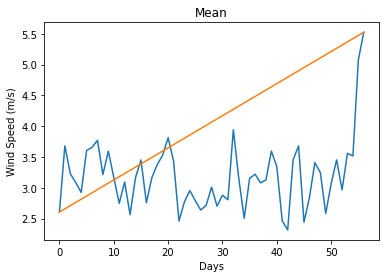

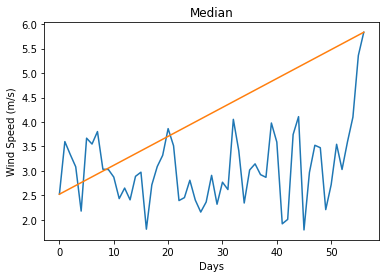

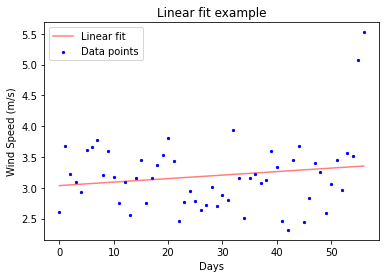

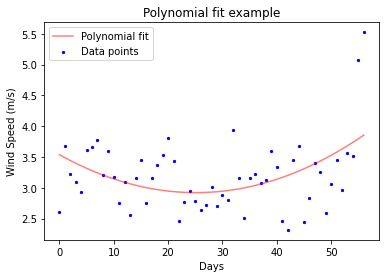

In [13]:
#Reshape array into 2D
arr2d = np.reshape(getAllDataByField(2), (-1, NUMBER_DAYS)).astype(np.float)

#Mean
arrmean = np.mean(arr2d,axis=0)
plt.plot(np.arange(NUMBER_DAYS),arrmean)
plt.plot([0,NUMBER_DAYS-1],[arrmean[0],arrmean[NUMBER_DAYS-1]])

plt.title("Mean")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Days")
plt.show()

#Median
arrmedian = np.median(arr2d,axis=0)
plt.plot(np.arange(NUMBER_DAYS),arrmedian)
plt.plot([0,NUMBER_DAYS-1],[arrmedian[0],arrmedian[NUMBER_DAYS-1]])

plt.title("Median")
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Days")
plt.show()


#Linear fit
x = np.arange(NUMBER_DAYS)
y = arrmean
fit = np.polyfit(x,y,1)
ang_coeff = fit[0]
intercept = fit[1]
fit_eq = ang_coeff*x + intercept
fig = plt.figure()
ax = fig.subplots()
ax.plot(x, fit_eq,color = 'r', alpha = 0.5, label = 'Linear fit')
ax.scatter(x,y,s = 5, color = 'b', label = 'Data points') #Original data points
ax.set_title('Linear fit example')
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Days")
ax.legend()
plt.show()

#Polynomial Fit
fit = np.polyfit(x, y, 2)
a = fit[0]
b = fit[1]
c = fit[2]
fit_equation = a * np.square(x) + b * x + c
#Plotting
fig1 = plt.figure()
ax1 = fig1.subplots()
ax1.plot(x, fit_equation,color = 'r',alpha = 0.5, label = 'Polynomial fit')
ax1.scatter(x, y, s = 5, color = 'b', label = 'Data points')
ax1.set_title('Polynomial fit example')
plt.ylabel("Wind Speed (m/s)")
plt.xlabel("Days")
ax1.legend()
plt.show()

### Net Positive speeds vs Net Negative speeds

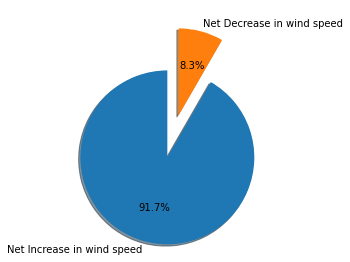

In [14]:
labels = ['Net Increase in wind speed','Net Decrease in wind speed']
sizes = [0,0]
explode = (.5,0)

for i in range(NUMBER_TORNADOS):
    
    #If temperature increased approaching day of Tornado
    if(getDataByFieldAndIndex(2,i).astype(np.float).flatten()[NUMBER_DAYS-1] - getDataByFieldAndIndex(2,i).astype(np.float).flatten()[0] > 0):
        sizes[0] += 1
    else:
        sizes[1] += 1

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()

## Surface Solar Radiation

### Linear graph of Surface Solar Radiation for all Tornados

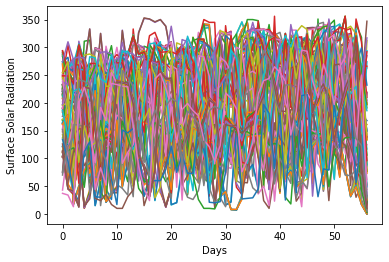

In [15]:
plt.ylabel("Surface Solar Radiation")
plt.xlabel("Days")

for i in range(NUMBER_TORNADOS):
    plt.plot(np.arange(NUMBER_DAYS),getDataByFieldAndIndex(3,i).astype(np.float).flatten())
plt.show()

### Linear graph of Net Surface Solar Radiation for all Tornados

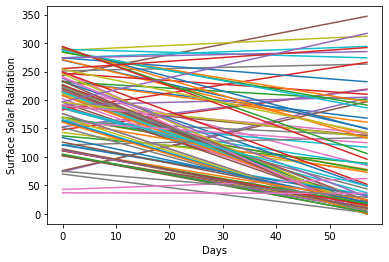

In [16]:
plt.ylabel("Surface Solar Radiation")
plt.xlabel("Days")

for i in range(NUMBER_TORNADOS):
    plt.plot([0,NUMBER_DAYS],[getDataByFieldAndIndex(3,i).astype(np.float).flatten()[0],getDataByFieldAndIndex(3,i).astype(np.float).flatten()[NUMBER_DAYS-1]])
plt.show()

### Mean and Median of Surface Solar Radiation across all Tornados 

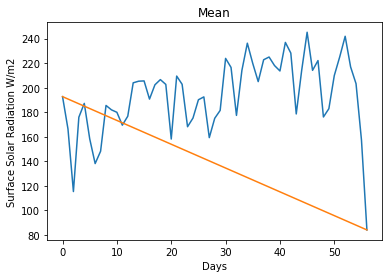

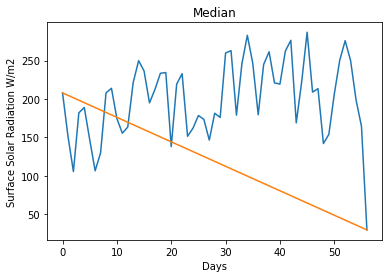

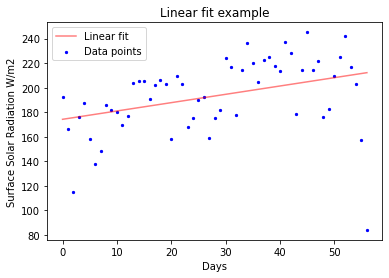

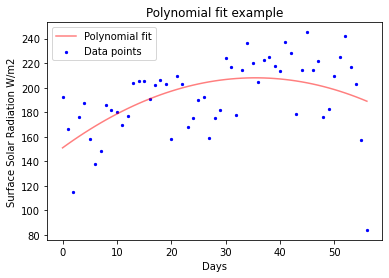

In [17]:
#Reshape array into 2D
arr2d = np.reshape(getAllDataByField(3), (-1, NUMBER_DAYS)).astype(np.float)

#Mean
arrmean = np.mean(arr2d,axis=0)
plt.plot(np.arange(NUMBER_DAYS),arrmean)
plt.plot([0,NUMBER_DAYS-1],[arrmean[0],arrmean[NUMBER_DAYS-1]])

plt.title("Mean")
plt.ylabel("Surface Solar Radiation W/m2")
plt.xlabel("Days")
plt.show()

#Median
arrmedian = np.median(arr2d,axis=0)
plt.plot(np.arange(NUMBER_DAYS),arrmedian)
plt.plot([0,NUMBER_DAYS-1],[arrmedian[0],arrmedian[NUMBER_DAYS-1]])

plt.title("Median")
plt.ylabel("Surface Solar Radiation W/m2")
plt.xlabel("Days")
plt.show()

#Polyfit

#Linear fit
x = np.arange(NUMBER_DAYS)
y = arrmean
fit = np.polyfit(x,y,1)
ang_coeff = fit[0]
intercept = fit[1]
fit_eq = ang_coeff*x + intercept
fig = plt.figure()
ax = fig.subplots()
ax.plot(x, fit_eq,color = 'r', alpha = 0.5, label = 'Linear fit')
ax.scatter(x,y,s = 5, color = 'b', label = 'Data points') #Original data points
ax.set_title('Linear fit example')
plt.ylabel("Surface Solar Radiation W/m2")
plt.xlabel("Days")
ax.legend()
plt.show()

#Polynomial Fit
fit = np.polyfit(x, y, 2)
a = fit[0]
b = fit[1]
c = fit[2]
fit_equation = a * np.square(x) + b * x + c
#Plotting
fig1 = plt.figure()
ax1 = fig1.subplots()
ax1.plot(x, fit_equation,color = 'r',alpha = 0.5, label = 'Polynomial fit')
ax1.scatter(x, y, s = 5, color = 'b', label = 'Data points')
ax1.set_title('Polynomial fit example')
plt.ylabel("Surface Solar Radiation W/m2")
plt.xlabel("Days")
ax1.legend()
plt.show()

### Net Positive Surface Solar Radiation vs Net Negative Surface Solar Radiation

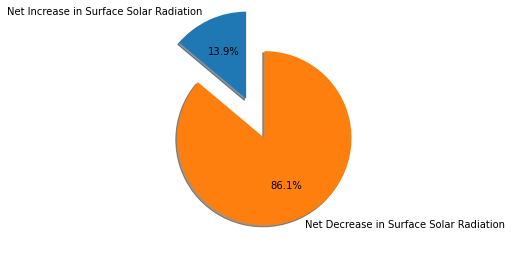

In [18]:
labels = ['Net Increase in Surface Solar Radiation ','Net Decrease in Surface Solar Radiation']
sizes = [0,0]
explode = (.5,0)

for i in range(NUMBER_TORNADOS):
    
    #If temperature increased approaching day of Tornado
    if(getDataByFieldAndIndex(3,i).astype(np.float).flatten()[NUMBER_DAYS-1] - getDataByFieldAndIndex(3,i).astype(np.float).flatten()[0] > 0):
        sizes[0] += 1
    else:
        sizes[1] += 1

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()    

## Relative Humidity

### Linear graph of Relative Humidity for all Tornados

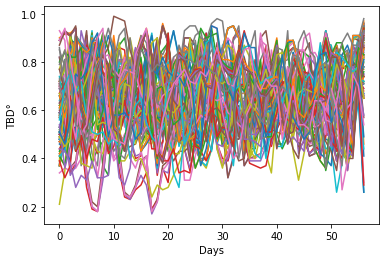

In [19]:
plt.ylabel("TBD°")
plt.xlabel("Days")

for i in range(NUMBER_TORNADOS):
    plt.plot(np.arange(NUMBER_DAYS),getDataByFieldAndIndex(4,i).astype(np.float).flatten())
plt.show()

### Linear graph of Net Relative Humidity for all Tornados

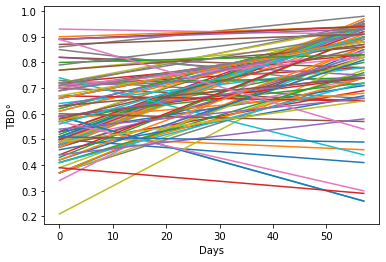

In [20]:
plt.ylabel("TBD°")
plt.xlabel("Days")

for i in range(NUMBER_TORNADOS):
    plt.plot([0,NUMBER_DAYS],[getDataByFieldAndIndex(4,i).astype(np.float).flatten()[0],getDataByFieldAndIndex(4,i).astype(np.float).flatten()[NUMBER_DAYS-1]])
plt.show()

### Mean and Median of Relative Humidity across all Tornados 

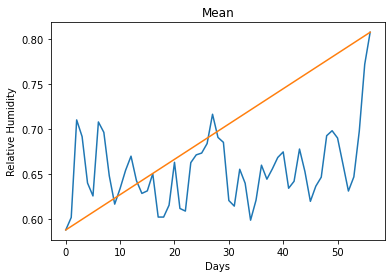

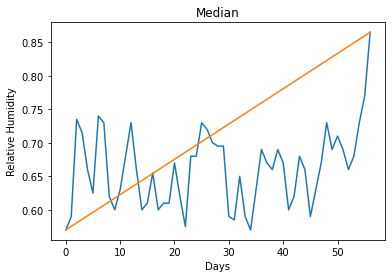

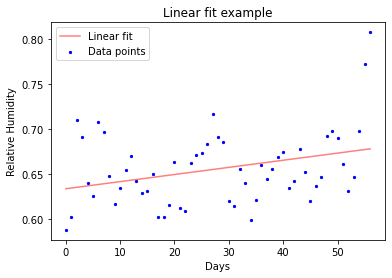

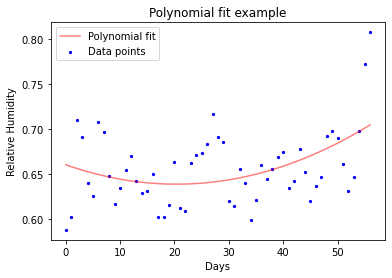

In [21]:
#Reshape array into 2D
arr2d = np.reshape(getAllDataByField(4), (-1, NUMBER_DAYS)).astype(np.float)

#Mean
arrmean = np.mean(arr2d,axis=0)
plt.plot(np.arange(NUMBER_DAYS),arrmean)
plt.plot([0,NUMBER_DAYS-1],[arrmean[0],arrmean[NUMBER_DAYS-1]])

plt.title("Mean")
plt.ylabel("Relative Humidity")
plt.xlabel("Days")
plt.show()

#Median
arrmedian = np.median(arr2d,axis=0)
plt.plot(np.arange(NUMBER_DAYS),arrmedian)
plt.plot([0,NUMBER_DAYS-1],[arrmedian[0],arrmedian[NUMBER_DAYS-1]])

plt.title("Median")
plt.ylabel("Relative Humidity")
plt.xlabel("Days")
plt.show()

#Polyfit

#Linear fit
x = np.arange(NUMBER_DAYS)
y = arrmean
fit = np.polyfit(x,y,1)
ang_coeff = fit[0]
intercept = fit[1]
fit_eq = ang_coeff*x + intercept
fig = plt.figure()
ax = fig.subplots()
ax.plot(x, fit_eq,color = 'r', alpha = 0.5, label = 'Linear fit')
ax.scatter(x,y,s = 5, color = 'b', label = 'Data points') #Original data points
ax.set_title('Linear fit example')
plt.ylabel("Relative Humidity")
plt.xlabel("Days")
ax.legend()
plt.show()

#Polynomial Fit
fit = np.polyfit(x, y, 2)
a = fit[0]
b = fit[1]
c = fit[2]
fit_equation = a * np.square(x) + b * x + c
#Plotting
fig1 = plt.figure()
ax1 = fig1.subplots()
ax1.plot(x, fit_equation,color = 'r',alpha = 0.5, label = 'Polynomial fit')
ax1.scatter(x, y, s = 5, color = 'b', label = 'Data points')
ax1.set_title('Polynomial fit example')
plt.ylabel("Relative Humidity")
plt.xlabel("Days")
ax1.legend()
plt.show()

### Net Positive Relative Humidity vs Net Negative Relative Humidity

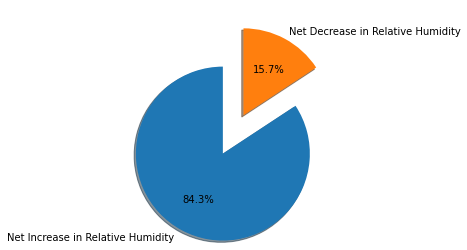

In [22]:
labels = ['Net Increase in Relative Humidity ','Net Decrease in Relative Humidity']
sizes = [0,0]
explode = (.5,0)

for i in range(NUMBER_TORNADOS):
    
    #If temperature increased approaching day of Tornado
    if(getDataByFieldAndIndex(4,i).astype(np.float).flatten()[NUMBER_DAYS-1] - getDataByFieldAndIndex(4,i).astype(np.float).flatten()[0] > 0):
        sizes[0] += 1
    else:
        sizes[1] += 1

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()    

## Surface Pressure

### Linear graph of Surface Pressure for all Tornados

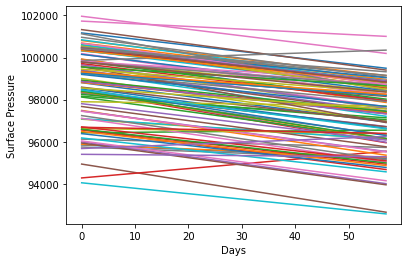

In [23]:
plt.ylabel("Surface Pressure")
plt.xlabel("Days")

for i in range(NUMBER_TORNADOS):
    plt.plot([0,NUMBER_DAYS],[getDataByFieldAndIndex(5,i).astype(np.float).flatten()[0],getDataByFieldAndIndex(5,i).astype(np.float).flatten()[NUMBER_DAYS-1]])
plt.show()

### Mean and Median of Surface Pressure across all Tornados 

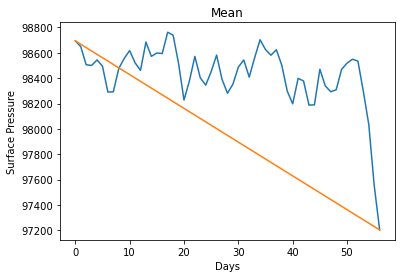

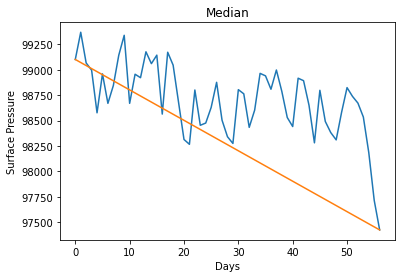

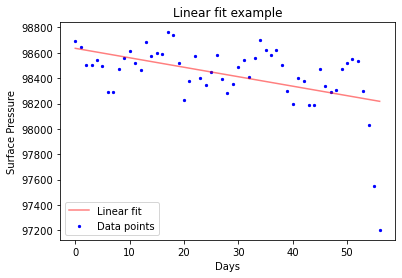

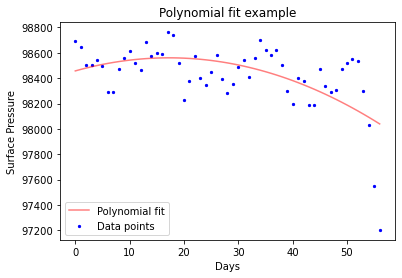

In [24]:
#Reshape array into 2D
arr2d = np.reshape(getAllDataByField(5), (-1, NUMBER_DAYS)).astype(np.float)

#Mean
arrmean = np.mean(arr2d,axis=0)
plt.plot(np.arange(NUMBER_DAYS),arrmean)
plt.plot([0,NUMBER_DAYS-1],[arrmean[0],arrmean[NUMBER_DAYS-1]])

plt.title("Mean")
plt.ylabel("Surface Pressure")
plt.xlabel("Days")
plt.show()

#Median
arrmedian = np.median(arr2d,axis=0)
plt.plot(np.arange(NUMBER_DAYS),arrmedian)
plt.plot([0,NUMBER_DAYS-1],[arrmedian[0],arrmedian[NUMBER_DAYS-1]])

plt.title("Median")
plt.ylabel("Surface Pressure")
plt.xlabel("Days")
plt.show()

#Polyfit

#Linear fit
x = np.arange(NUMBER_DAYS)
y = arrmean
fit = np.polyfit(x,y,1)
ang_coeff = fit[0]
intercept = fit[1]
fit_eq = ang_coeff*x + intercept
fig = plt.figure()
ax = fig.subplots()
ax.plot(x, fit_eq,color = 'r', alpha = 0.5, label = 'Linear fit')
ax.scatter(x,y,s = 5, color = 'b', label = 'Data points') #Original data points
ax.set_title('Linear fit example')
plt.ylabel("Surface Pressure")
plt.xlabel("Days")
ax.legend()
plt.show()

#Polynomial Fit
fit = np.polyfit(x, y, 2)
a = fit[0]
b = fit[1]
c = fit[2]
fit_equation = a * np.square(x) + b * x + c
#Plotting
fig1 = plt.figure()
ax1 = fig1.subplots()
ax1.plot(x, fit_equation,color = 'r',alpha = 0.5, label = 'Polynomial fit')
ax1.scatter(x, y, s = 5, color = 'b', label = 'Data points')
ax1.set_title('Polynomial fit example')
plt.ylabel("Surface Pressure")
plt.xlabel("Days")
ax1.legend()
plt.show()

### Net Positive Surface Pressure vs Net Negative Surface Pressure

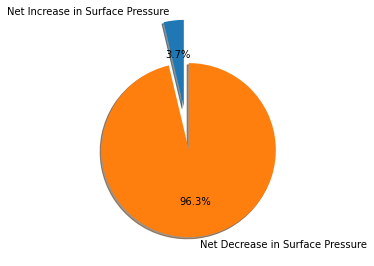

In [25]:
labels = ['Net Increase in Surface Pressure ','Net Decrease in Surface Pressure']
sizes = [0,0]
explode = (.5,0)

for i in range(NUMBER_TORNADOS):
    
    #If temperature increased approaching day of Tornado
    if(getDataByFieldAndIndex(5,i).astype(np.float).flatten()[NUMBER_DAYS-1] - getDataByFieldAndIndex(5,i).astype(np.float).flatten()[0] > 0):
        sizes[0] += 1
    else:
        sizes[1] += 1

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
plt.show()  

## Precipitation Example

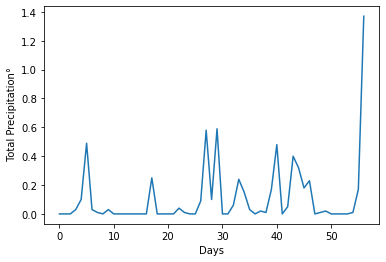

In [26]:

plt.ylabel(" Total Precipitation°")
plt.xlabel("Days")
plt.plot(np.arange(NUMBER_DAYS),getDataByFieldAndIndex(6,5).astype(np.float).flatten())

plt.show()

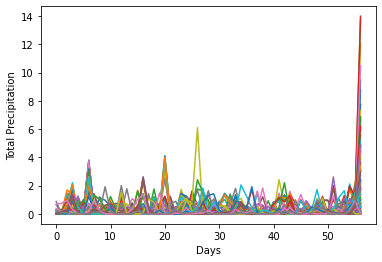

In [27]:
plt.ylabel("Total Precipitation")
plt.xlabel("Days")

for i in range(NUMBER_TORNADOS):
    plt.plot(np.arange(NUMBER_DAYS),getDataByFieldAndIndex(6,i).astype(np.float).flatten())
plt.show()

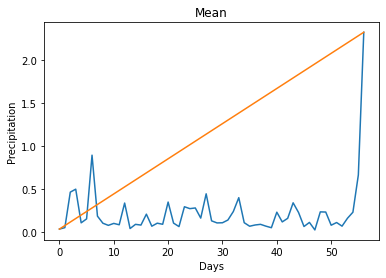

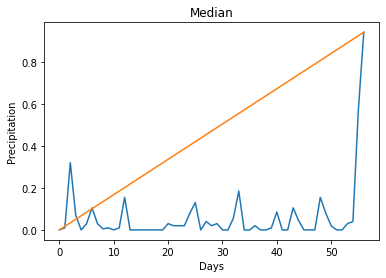

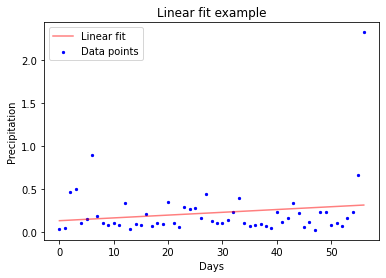

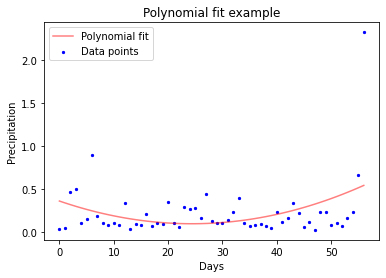

In [28]:
#Reshape array into 2D
arr2d = np.reshape(getAllDataByField(6), (-1, NUMBER_DAYS)).astype(np.float)

#Mean
arrmean = np.mean(arr2d,axis=0)
plt.plot(np.arange(NUMBER_DAYS),arrmean)
plt.plot([0,NUMBER_DAYS-1],[arrmean[0],arrmean[NUMBER_DAYS-1]])

plt.title("Mean")
plt.ylabel("Precipitation")
plt.xlabel("Days")
plt.show()

#Median
arrmedian = np.median(arr2d,axis=0)
plt.plot(np.arange(NUMBER_DAYS),arrmedian)
plt.plot([0,NUMBER_DAYS-1],[arrmedian[0],arrmedian[NUMBER_DAYS-1]])

plt.title("Median")
plt.ylabel("Precipitation")
plt.xlabel("Days")
plt.show()

#Polyfit

#Linear fit
x = np.arange(NUMBER_DAYS)
y = arrmean
fit = np.polyfit(x,y,1)
ang_coeff = fit[0]
intercept = fit[1]
fit_eq = ang_coeff*x + intercept
fig = plt.figure()
ax = fig.subplots()
ax.plot(x, fit_eq,color = 'r', alpha = 0.5, label = 'Linear fit')
ax.scatter(x,y,s = 5, color = 'b', label = 'Data points') #Original data points
ax.set_title('Linear fit example')
plt.ylabel("Precipitation")
plt.xlabel("Days")
ax.legend()
plt.show()

#Polynomial Fit
fit = np.polyfit(x, y, 2)
a = fit[0]
b = fit[1]
c = fit[2]
fit_equation = a * np.square(x) + b * x + c
#Plotting
fig1 = plt.figure()
ax1 = fig1.subplots()
ax1.plot(x, fit_equation,color = 'r',alpha = 0.5, label = 'Polynomial fit')
ax1.scatter(x, y, s = 5, color = 'b', label = 'Data points')
ax1.set_title('Polynomial fit example')
plt.ylabel("Precipitation")
plt.xlabel("Days")
ax1.legend()
plt.show()


